In [1]:
# Importing and cleaning dataset 

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mlt

from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score 

In [2]:
Diabetes = pd.read_csv('diabetes.csv')
Diabetes = Diabetes.dropna(thresh=9)
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
# For purpose of predictive modelling split data into test and training set.
M_Diabetes = Diabetes 
Outcome  = M_Diabetes['Outcome']
M_Diabetes.drop('Outcome', axis=1, inplace = True)

In [5]:
# Splitting data into positive and negative examples
Diabetes = pd.read_csv('diabetes.csv')
Positives  = Diabetes[Diabetes['Outcome'] == 1]
Negatives = Diabetes[Diabetes['Outcome'] == 0]

## Exploratory Data Analysis 

In [6]:
Diabetes.sample(frac =0.1).head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
686,3,130,64,0,0,23.1,0.314,22,0
141,5,106,82,30,0,39.5,0.286,38,0
563,6,99,60,19,54,26.9,0.497,32,0
102,0,125,96,0,0,22.5,0.262,21,0
225,1,87,78,27,32,34.6,0.101,22,0


In [7]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


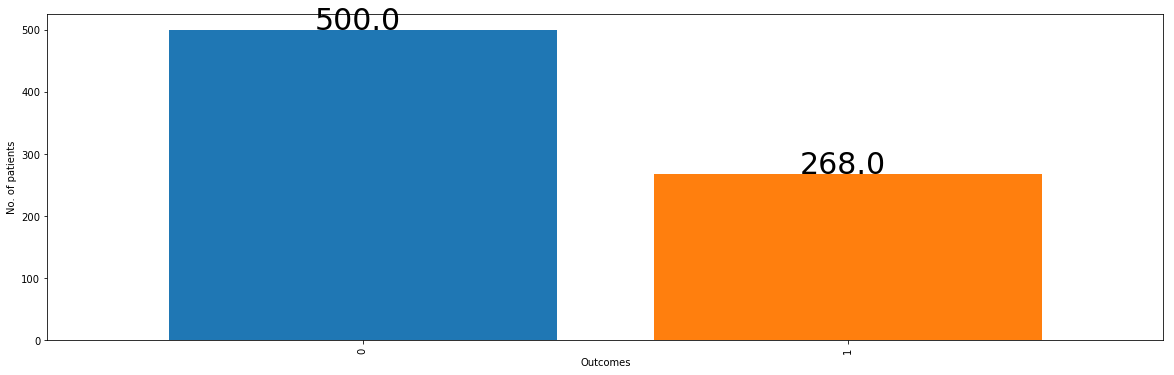

In [8]:
# Visualize number of different classes 


ax = plt.subplots(figsize=(20,6))
ax = Diabetes['Outcome'].value_counts().plot(kind='bar', width=0.8)
ax.set_xlabel('Outcomes')
ax.set_ylabel('No. of patients')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.3,p.get_height()+0.1), fontsize=30)
plt.show()

In [9]:
# For curve fittng 
from scipy import stats 
% matplotlib inline 

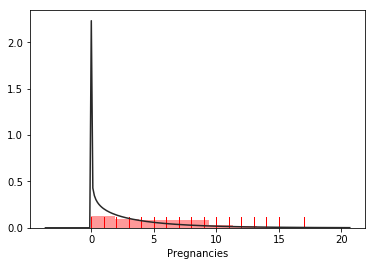

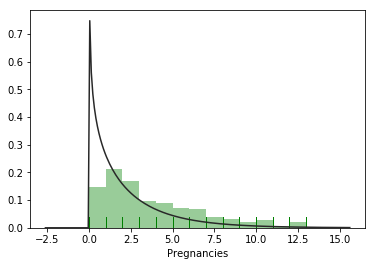

In [10]:
# Density of Prenancies 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['Pregnancies'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['Pregnancies'], rug=True, kde=False, color='g', fit=stats.gamma, ax=ax2)

In [11]:
# From above it could be noted that there is little between having Diabetes to pregnancies.

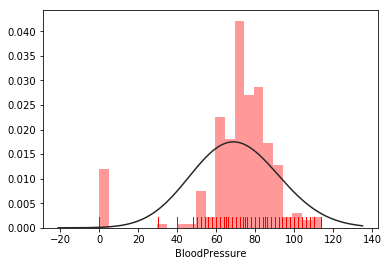

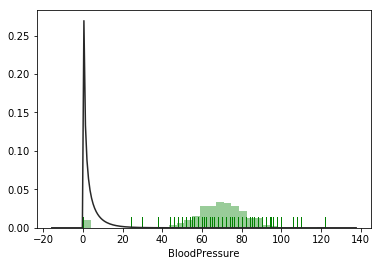

In [12]:
# Density of Blood Pressure 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['BloodPressure'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['BloodPressure'], rug=True, kde=False, color='g', fit=stats.gamma, ax=ax2)

In [13]:
# From above graph we can say, blood pressure is highly correlated with getting diabetes 

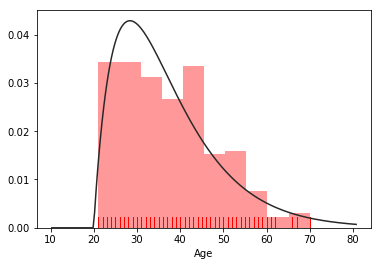

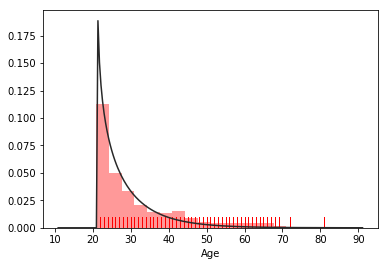

In [14]:
#Density of Age 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['Age'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['Age'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax2)

In [15]:
# Age shows a great correlation with chances of diabetes 

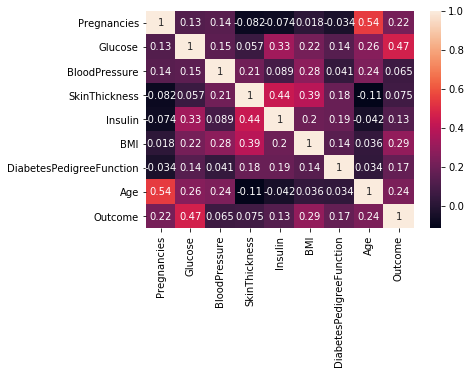

In [16]:
# Correlation between variables 
Corr = Diabetes[Diabetes.columns].corr()
sns.heatmap(Corr, annot=True)

## Predictive modelling 

In [17]:
Diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
# Importing required libraries for machine learning algorithms 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn import tree

In [19]:
# Naive Bayes Algorithm 
gNB = GaussianNB()
scores = cross_val_score(gNB, M_Diabetes, Outcome, cv=5)
print("Accuracy : ", scores.mean())

Accuracy :  0.751336898396


In [20]:
# K Nearest Neighbors Algorithm 
scores = []

for i in range(1,31):
    neighbor = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(neighbor, M_Diabetes, Outcome, cv=5).mean())
    
max_a=0
k_max = 0

for i in range(0, 30):
    if(scores[i] >= max_a):
        max_a = scores[i]
        if(i>k_max):
            k_max=i
            
print("K is maximum in Knn for ", k_max, " with a accuracy of ", max_a)            

K is maximum in Knn for  13  with a accuracy of  0.757855869621


In [21]:
# Support Vector Machine

In [22]:
# Linear Kernel 
clf = svm.SVC(kernel = 'linear')
print("Accuracy : ", cross_val_score(clf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.765682030388


In [23]:
# RBF Kernel 
clf_r = svm.SVC(kernel = 'rbf')
print("Accuracy : ", cross_val_score(clf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.765682030388


In [24]:
# Decision Tree 
from sklearn import tree
cl = tree.DecisionTreeClassifier()
print("Accuracy : ", cross_val_score(cl, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.709752992106


In [25]:
# Random Forest 
Rf = RandomForestClassifier()
print("Accuracy : ", cross_val_score(Rf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.750029708853


In [26]:
# Artificial Neural Network 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [27]:
Numpy_Matrix = M_Diabetes.as_matrix()
Numpy_Outcome = Outcome.as_matrix()

In [28]:
K_fold = StratifiedKFold(n_splits=4, shuffle = True)
cv_scores = []

for train, test in K_fold.split(M_Diabetes, Outcome):
    
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_dim = 8))
    model.add(Dense(12, activation = 'relu', input_dim = 8))
    model.add(Dense(12, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    model.fit(Numpy_Matrix[train], Numpy_Outcome[train], epochs = 400, batch_size = 32)
    
    scores = model.evaluate(Numpy_Matrix[test], Numpy_Outcome[test])
    cv_scores.append(scores[1]*100)

ValueError: Only call `sigmoid_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)

In [ ]:
def Mean(Scores):
    Sum =0 
    for i in Scores:
        Sum+=i 
        
    return(Sum/len(Scores))

In [ ]:
print(Mean(cv_scores))

In [ ]:
# Learning algorithm with best accuracy is linear SVM 

In [ ]:
# Eliminating irrelevant features using correlation matrix 
Corr.mean()

In [ ]:
Data_P = Diabetes 
Data_P.drop('Pregnancies', axis = 1, inplace = True)
Data_P.drop('Outcome', axis = 1, inplace = True)
clf = svm.SVC(kernel = 'linear')
print("Accuracy : ", cross_val_score(clf, Data_P, Outcome, cv=5).mean())

In [ ]:
# it is founded that eliminating pregnancies feature resulted in a better accuracy. However,
# feature Diabetes Pedigree Function and both DPF and pregnancies resulted in same accuracy.

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(Data_P, Outcome, test_size = 0.5, random_state = 0)
clf.fit(x_train, y_train)
Confusion = confusion_matrix(y_test, clf.predict(x_test))
sns.heatmap(Confusion, annot = True,)

In [ ]:
print(classification_report(y_test, clf.predict(x_test)))

In [ ]:
# Workshop 

In [3]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
dataframe = pd.read_csv('diabetes.csv')
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]